In [6]:
# Gibbs sampler for the change-point model described in a Cognition cheat sheet titled "Gibbs sampling."
# This is a Python implementation of the procedure at http://www.cmpe.boun.edu.tr/courses/cmpe58n/fall2009/
# Written by Ilker Yildirim, September 2012.

from scipy.stats import uniform, gamma, poisson
import matplotlib.pyplot as plt
import numpy
from numpy import log,exp
from numpy.random import multinomial

# fix the random seed for replicability.
numpy.random.seed(123456789)

%matplotlib inline

In [4]:
# Hyperparameters
N=50
a=2
b=1

# Change-point: where the intensity parameter changes.
n=int(round(uniform.rvs()*N))
print str(n)

# Intensity values
lambda1=gamma.rvs(a,scale=1./b) # We use 1/b instead of b because of the way Gamma distribution is parametrized in the package random.
lambda2=gamma.rvs(a,scale=1./b)

lambdas=[lambda1]*n
lambdas[n:N-1]=[lambda2]*(N-n)

# Observations, x_1 ... x_N
x=poisson.rvs(lambdas)

27


At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
At iteration 10
At iteration 11
At iteration 12
At iteration 13
At iteration 14
At iteration 15
At iteration 16
At iteration 17
At iteration 18
At iteration 19
At iteration 20
At iteration 21
At iteration 22
At iteration 23
At iteration 24
At iteration 25
At iteration 26
At iteration 27
At iteration 28
At iteration 29
At iteration 30
At iteration 31
At iteration 32
At iteration 33
At iteration 34
At iteration 35
At iteration 36
At iteration 37
At iteration 38
At iteration 39
At iteration 40
At iteration 41
At iteration 42
At iteration 43
At iteration 44
At iteration 45
At iteration 46
At iteration 47
At iteration 48
At iteration 49


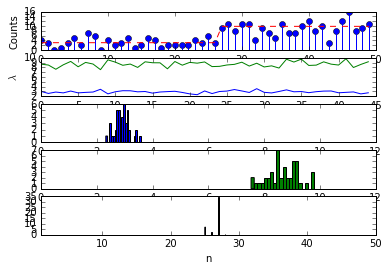

In [7]:
# make one big subplots and put everything in it.
f, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1)
# Plot the data
ax1.stem(range(N),x,linefmt='b-', markerfmt='bo')
ax1.plot(range(N),lambdas,'r--')
ax1.set_ylabel('Counts')

# Gibbs sampler
E=50
BURN_IN=5

# Initialize the chain
n=int(round(uniform.rvs()*N))
lambda1=gamma.rvs(a,scale=1./b)
lambda2=gamma.rvs(a,scale=1./b)

# Store the samples
chain_n=numpy.array([0.]*(E-BURN_IN))
chain_lambda1=numpy.array([0.]*(E-BURN_IN))
chain_lambda2=numpy.array([0.]*(E-BURN_IN))

for e in range(E):
	print "At iteration "+str(e)
	# sample lambda1 and lambda2 from their posterior conditionals, Equation 8 and Equation 9, respectively.
	lambda1=gamma.rvs(a+sum(x[0:n]), scale=1./(n+b))
	lambda2=gamma.rvs(a+sum(x[n:N]), scale=1./(N-n+b))
	
	# sample n, Equation 10
	mult_n=numpy.array([0]*N)
	for i in range(N):
		mult_n[i]=sum(x[0:i])*log(lambda1)-i*lambda1+sum(x[i:N])*log(lambda2)-(N-i)*lambda2
	mult_n=exp(mult_n-max(mult_n))
	n=numpy.where(multinomial(1,mult_n/sum(mult_n),size=1)==1)[1][0]
	
	# store
	if e>=BURN_IN:
		chain_n[e-BURN_IN]=n
		chain_lambda1[e-BURN_IN]=lambda1
		chain_lambda2[e-BURN_IN]=lambda2

ax2.plot(chain_lambda1,'b',chain_lambda2,'g')
ax2.set_ylabel('$\lambda$')
ax3.hist(chain_lambda1,20)
ax3.set_xlabel('$\lambda_1$')
ax3.set_xlim([0,12])
ax4.hist(chain_lambda2,20,color='g')
ax4.set_xlim([0,12])
ax4.set_xlabel('$\lambda_2$')
ax5.hist(chain_n,50)
ax5.set_xlabel('n')
ax5.set_xlim([1,50])
plt.show()

In [8]:
?gamma